In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.shape

(1156, 7)

In [5]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
#Change the data type of start date and end date

In [7]:
df["START_DATE*"]=pd.to_datetime(df["START_DATE*"],errors="coerce")

df["END_DATE*"]=pd.to_datetime(df["END_DATE*"],errors="coerce")

In [8]:
#to create new column

In [9]:
from datetime import datetime

In [10]:
df["date"]=pd.DatetimeIndex(df["START_DATE*"]).date

In [39]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
df["time"]=pd.DatetimeIndex(df["START_DATE*"]).hour

In [13]:
df["day-nyt"]=pd.cut(x=df["time"],bins=[0,10,15,19,24],labels=["morning","afternoon","evening","night"])

In [14]:
df.dropna(inplace=True)

Data Visulization

<Axes: xlabel='count', ylabel='PURPOSE*'>

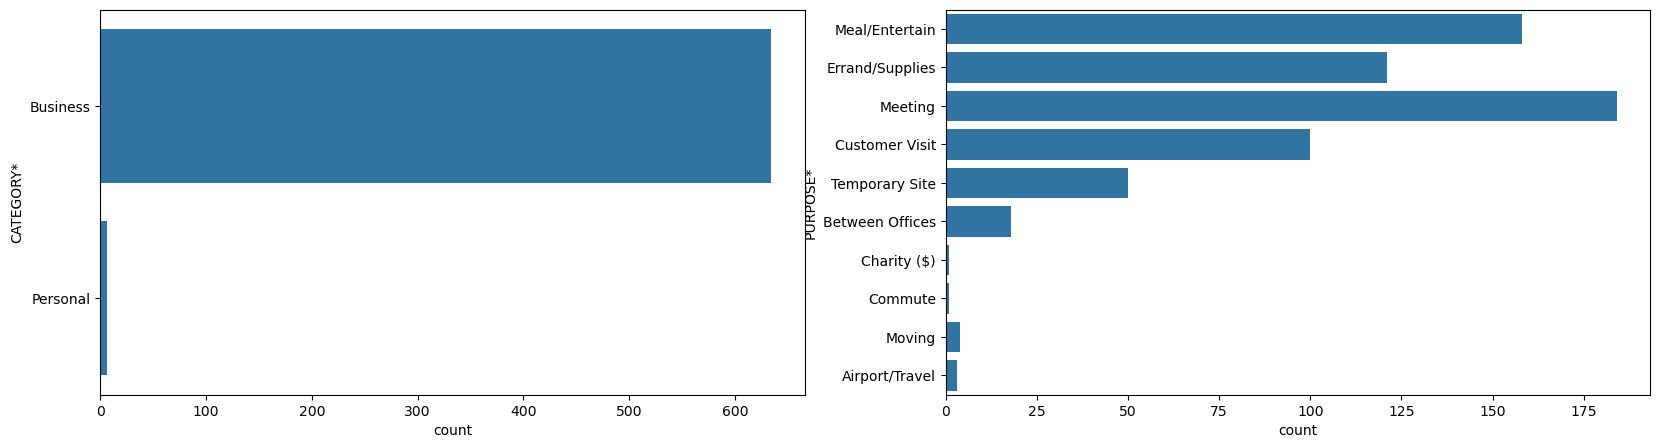

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df["CATEGORY*"])

plt.subplot(1,2,2)
sns.countplot(df["PURPOSE*"])

Conclusion = Maximum time uber uses for business purpose like meetings 

<Axes: xlabel='count', ylabel='day-nyt'>

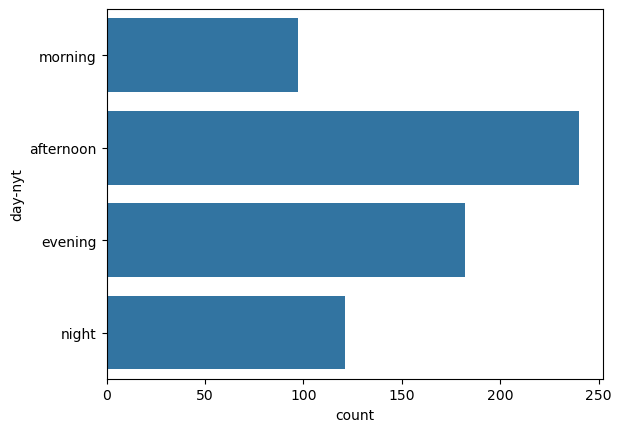

In [18]:
sns.countplot(df["day-nyt"])

Conclusion = most of people use uber in afternoon

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-nyt
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,evening


In [21]:
df["Month"]=pd.DatetimeIndex(df["START_DATE*"]).month

month_label={1.0:"jan",2.0:"feb",3.0:"mar",4.0:"apr",5.0:"may",
             6.0:"june",7.0:"july",8.0:"aug",9.0:"sep",10.0:"oct",
             11.0:"nov",12.0:"dec"}
df["Month"]=df.Month.map(month_label)
mon=df.Month.value_counts(sort=False)

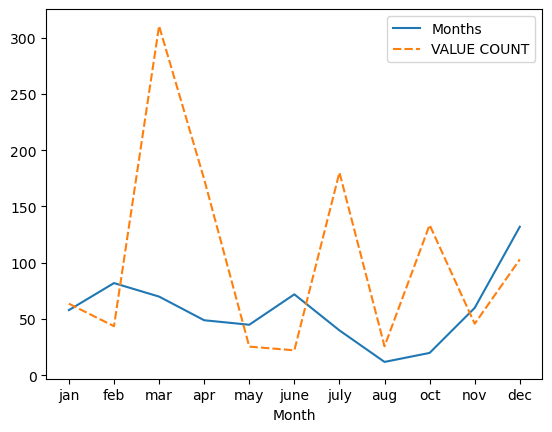

In [22]:
df=pd.DataFrame({"Months":mon.values,
                 "VALUE COUNT":df.groupby("Month",sort=False)["MILES*"].max()})

li=sns.lineplot(data=df)

Conclusion= Feb To april uber rides max booked as comparsion to other moths

In [57]:
df["day"]=df.START_DATE*.dt.weekday

data_label={0:"sun",1:"mon",2:"tues",3:"wed",4:"thu",5:"fri",6:"sat"}

df["day"]=df["day"].map(data_label)

SyntaxError: invalid syntax (3960878371.py, line 1)